In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('QueryResultsJune72022.csv', names=['DATE', 'LANGUAGE', 'POSTS'], header=0)


In [21]:
df.shape

(2300, 3)

In [18]:
df.head()

,DATE,LANGUAGE,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,506
4,2008-08-01 00:00:00,c++,164


In [24]:
df.tail()

,DATE,LANGUAGE,POSTS
2295,2022-05-01 00:00:00,php,4879
2296,2022-05-01 00:00:00,python,25935
2297,2022-05-01 00:00:00,r,5078
2298,2022-05-01 00:00:00,ruby,529
2299,2022-05-01 00:00:00,swift,1949


In [25]:
df.DATE = pd.to_datetime(df.DATE)

In [26]:
df.head()

,DATE,LANGUAGE,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,506
4,2008-08-01,c++,164


In [22]:
df.groupby('LANGUAGE').sum()

,POSTS
LANGUAGE,
assembly,40443
c,380092
c#,1539692
c++,765828
delphi,49625
go,61728
java,1846897
javascript,2379108
perl,66733


In [23]:
df.groupby('LANGUAGE').count()

,DATE,POSTS
LANGUAGE,,
assembly,166,166
c,166,166
c#,167,167
c++,166,166
delphi,166,166
go,151,151
java,166,166
javascript,166,166
perl,166,166


In [27]:
df_pivot = df.pivot(index='DATE', columns='LANGUAGE', values='POSTS')

In [28]:
df_pivot.head()

LANGUAGE,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,506.0,164.0,14.0,NaN,222.0,164.0,28.0,159.0,120.0,NaN,70.0,NaN
2008-09-01,28.0,318.0,1648.0,753.0,104.0,NaN,1133.0,637.0,130.0,478.0,537.0,6.0,288.0,NaN
2008-10-01,15.0,303.0,1989.0,809.0,112.0,NaN,1151.0,724.0,127.0,612.0,508.0,NaN,248.0,NaN
2008-11-01,17.0,259.0,1732.0,734.0,141.0,NaN,957.0,580.0,97.0,502.0,452.0,1.0,159.0,NaN


In [31]:
df_pivot.tail()

LANGUAGE,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2022-01-01,240.0,2062.0,5908.0,3885.0,151.0,792.0,7700.0,16253.0,131.0,4003.0,22611.0,4249.0,477.0,1988.0
2022-02-01,226.0,1790.0,5841.0,3484.0,187.0,689.0,7287.0,15473.0,97.0,3729.0,22676.0,4343.0,456.0,1885.0
2022-03-01,256.0,2104.0,6502.0,3852.0,134.0,832.0,8144.0,16383.0,106.0,3779.0,24648.0,5096.0,529.0,2086.0
2022-04-01,268.0,1890.0,5987.0,3884.0,121.0,761.0,7910.0,16092.0,101.0,3854.0,23759.0,4795.0,496.0,1788.0
2022-05-01,344.0,2137.0,6935.0,4463.0,147.0,810.0,8887.0,17872.0,105.0,4879.0,25935.0,5078.0,529.0,1949.0


In [32]:
df_pivot.shape

(167, 14)

In [55]:
for column in df_pivot.columns:
    print(f'{column}: {df_pivot[column].max()}')

assembly: 452.0
c: 4562.0
c#: 16168.0
c++: 8668.0
delphi: 573.0
go: 832.0
java: 21986.0
javascript: 24099.0
perl: 955.0
php: 18375.0
python: 29486.0
r: 6173.0
ruby: 2947.0
swift: 5148.0


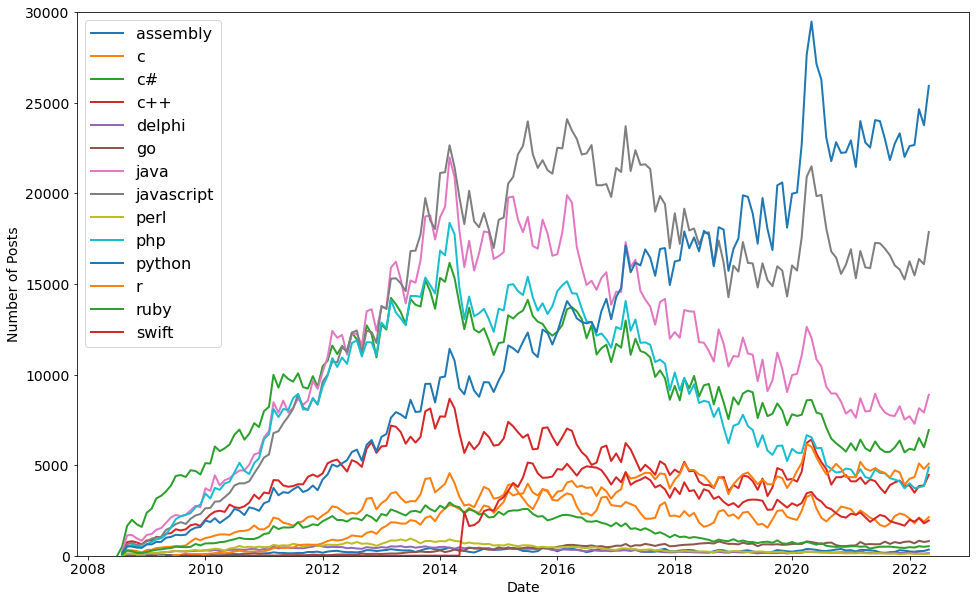

In [60]:
# Monthly

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 30000)

for column in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[column], linewidth=2, label=df_pivot[column].name)

plt.legend(fontsize=16)

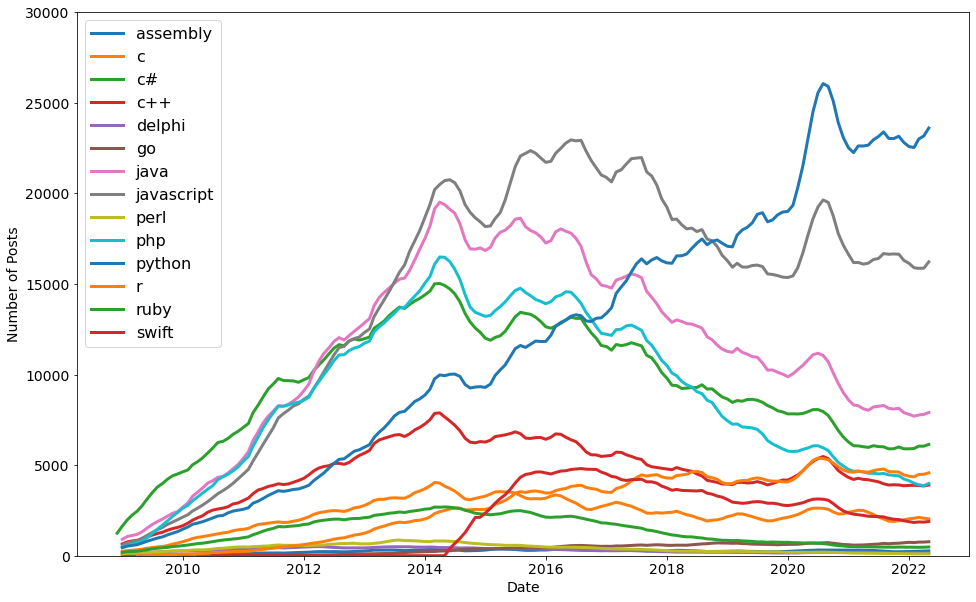

In [61]:
#Semiannual

df_rolling = df_pivot.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 30000)

for column in df_rolling.columns:
    plt.plot(df_rolling.index, df_rolling[column],
             linewidth=3, label=df_rolling[column].name)

plt.legend(fontsize=16)

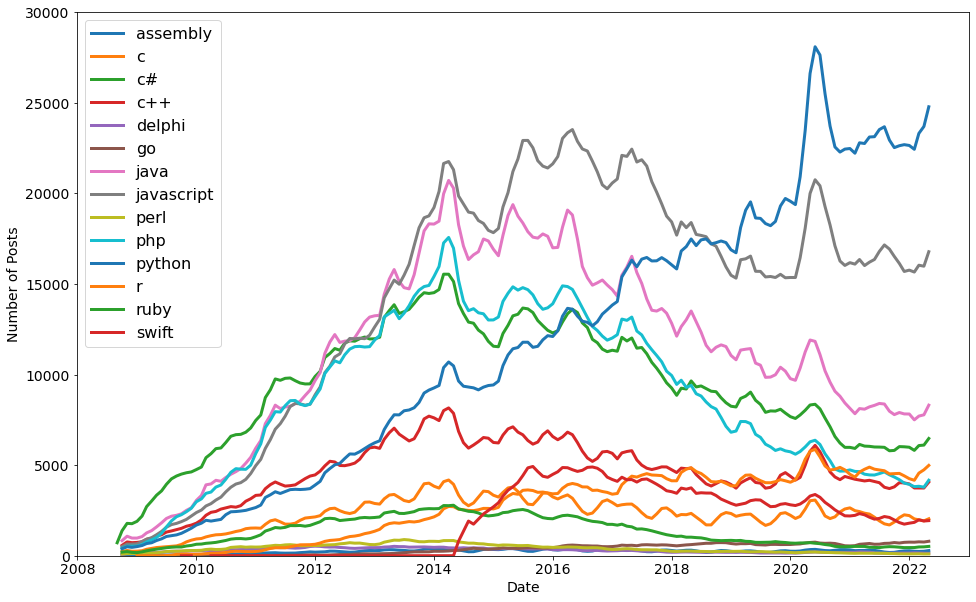

In [62]:
#Quarterly

df_rolling = df_pivot.rolling(window=3).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 30000)

for column in df_rolling.columns:
    plt.plot(df_rolling.index, df_rolling[column],
             linewidth=3, label=df_rolling[column].name)

plt.legend(fontsize=16)

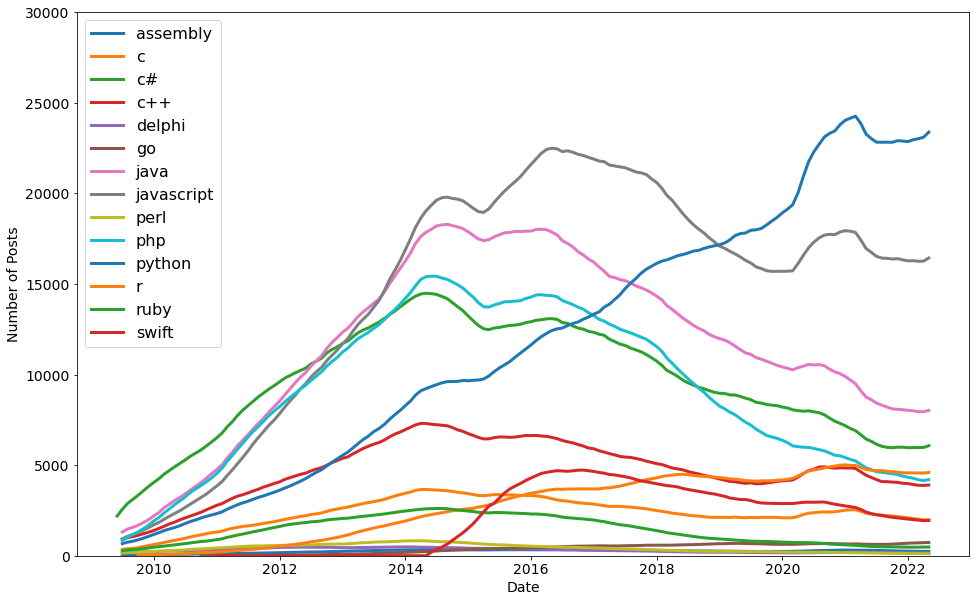

In [63]:
#Annually

df_rolling = df_pivot.rolling(window=12).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 30000)

for column in df_rolling.columns:
    plt.plot(df_rolling.index, df_rolling[column],
             linewidth=3, label=df_rolling[column].name)

plt.legend(fontsize=16)